# Contour Detection

Contour is a curve joining all the continuous points, having same color or intensity.

In [90]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## How It Works

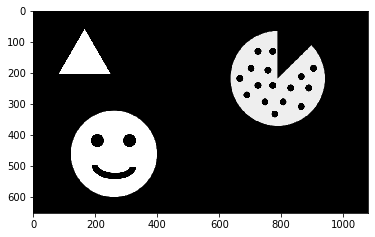

In [91]:
img = cv.imread('../assets/internal_external.png', 0)
plt.imshow(img, cmap="gray")

### Applying the Algorithm

In [92]:
contours, hiararchy = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

### External Contours

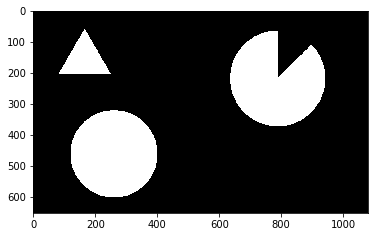

In [93]:
external_contours = np.zeros(img.shape)

for i in range(len(contours)):
    # Extermal
    if hiararchy[0][i][3] == -1:
        cv.drawContours(external_contours, contours, i, 255, -1)
        
plt.imshow(external_contours, cmap="gray")

### Internal Contours

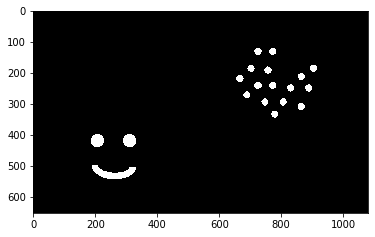

In [94]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    # Extermal
    if hiararchy[0][i][3] != -1:
        cv.drawContours(internal_contours, contours, i, 255, -1)
        
plt.imshow(internal_contours, cmap="gray")

## Examples
### The screw's nut

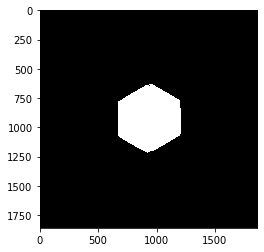

In [165]:
# Import
img = cv.imread('../assets/porca_frontal.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# 
# Threshold
max_value = 255
block_size = 105
c = 27
threshold_img = cv.adaptiveThreshold(img, max_value, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, block_size, c)
# 
# Identify contour
contours, hiararchy = cv.findContours(threshold_img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
# 
# Display external contours
external_contours = np.zeros(img.shape, dtype=np.float32)
for i in range(len(contours)):
    if hiararchy[0][i][3] == -1:
        cv.drawContours(external_contours, contours, i, 255, -1)

plt.imshow(external_contours, cmap="gray")

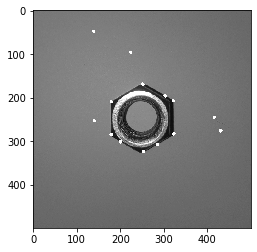

In [166]:
external_img_resized = cv.resize(external_contours, (500,500))
# 
# Identify corners
max_corners = 14
quality_level = 0.01
min_distance = 20

corners = cv.goodFeaturesToTrack(external_img_resized, max_corners, quality_level,min_distance)
# 
# Display corners
img_resized = cv.resize(img, (500,500))
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv.circle(img_resized, (x,y), 4, (255,0,0), -1)

plt.imshow(img_resized, cmap="gray")
